<a href="https://colab.research.google.com/github/mathmeza/project-credit_card_fraud_detection/blob/main/Projeto_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Detecção de Fraude em Cartão de Crédito*

<center><img alt="Analisando Airbnb" width="70%" src="https://images.unsplash.com/photo-1563013544-824ae1b704d3?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=750&q=80"></center>
<center> Photo: unsplash.com </center>

O pagamento com cartão de crédito obteve um aumento exponencial de utilização em decorrência de 3 principais pontos: 
- Tecnologia;
- Facilidade na obtenção;
- Maior variedade de empresas que disponibilizam esse método de pagamento em conjunto com empresas que aceitam o método de pagamento. 

Ao mesmo tempo, os fraudadores tendo essa visão de crescimento deste método de pagamento, começaram a impactar cada vez mais o mercado com a realização de fraude em pessoas inocentes. 
  
Devido este problema que tende a aumentar, é de suma importância que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas para que os clientes não sejam cobrados por itens que não compraram.
  
**A ideia deste projeto é trazer métodos de identificação de fraude em cartão de crédito com Machine Learning (Aprendizado de Máquina).**



## Importação dos dados

Através do [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) que de forma resumida é um site com diversas bases de dados e competições de ciência de dados, disponibilizaram um `Dataset` que justamente apresenta o ponto supracitado de exemplos de fraude em cartões de crédito e com isto, conseguiremos propor maneiras de minimizar esse problema.


*   Será utilizado o arquivo `creditcard.csv`



In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pré-processamento
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

# Validação
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
base = pd.read_csv('creditcard.csv')

## Preparação dos dados

Nesta etapa, organizaremos nossos dados para facilitar na exploração e modelagem.

In [3]:
# Verificar quantidade de linhas e colunas
print(f'Dataset possui {base.shape[0]} linhas')
print(f'Dataset possui {base.shape[1]} colunas')

# Verificar as 5 primeiras entradas do dataset
base.head(5) 

Dataset possui 284807 linhas
Dataset possui 31 colunas


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Informações sobre as colunas:

- `Time` - Número de segundos decorridos entre a transação atual e a primeira transação no conjunto de dados;
- `Colunas de "V1" até "V28"` - São features (características) dos usuários nas quais são resultados de um processo de PCA (Redução de dimensionalidade) para proteger a identidade e a sensibilidade dos dados.
- `Amount` - Valor em USD da transação;
- `Class` - Identificador se foi realmente fraude ou não.

 

In [4]:
# Analisar se há dados faltantes e tipos de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Não há dados ausentes em nossa base e as features estão com seus respectivos tipos de dados já tratados para os próximos passos.

## Análise Exploratória

Iremos realizar algumas análises estatísticas para entender melhor o impacto das features que temos no dataset.

In [5]:
# Gerar uma tabela de estatística descritiva dos dados.
base.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,-0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,-0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


Como a maioria das features passaram por um processo de PCA, a maioria das variáveis apresentam certa estabilidade, porém, quando verificamos a variável **`Amount`**, é perceptível que até 75% dos nossos dados chegam ao valor de 77.16 USD, porém, o valor máximo é de 25691.16 USD e que pode ser que tenhamos Outliers nesta variável. 

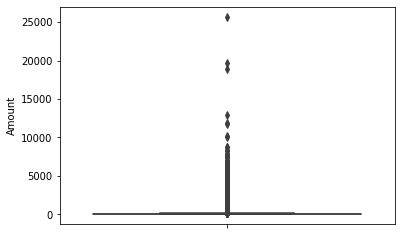

In [6]:
# Criar boxplot para verificação de Outliers
ax = sns.boxplot(y="Amount", data=base);

Como no gráfico acima, realmente temos um problema de outliers, realizaremos a normalização para não impactar de forma abrupta nosso modelo.

In [7]:
# Normalizar dados da variável Amount
scaler = StandardScaler()
amount = base['Amount'].values
base['Amount'] = scaler.fit_transform(amount.reshape(-1, 1))

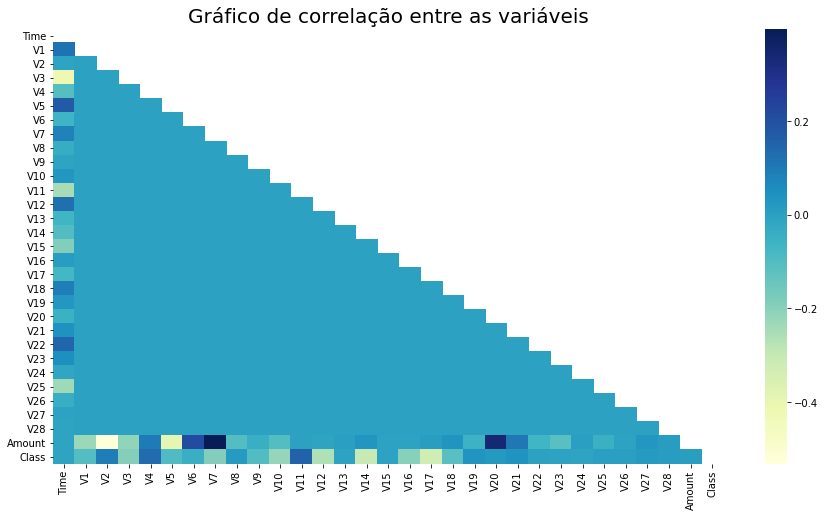

In [8]:
# Verificar correlação entre as variáveis
corr = base.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,8))
plt.title('Gráfico de correlação entre as variáveis', fontsize=20)
sns.heatmap(data=corr, annot=False, mask=mask, cmap="YlGnBu");

As variáveis que possuem redução de dimensionalidade não se relacionam entre si o que pode ser em decorrência do próprio PCA, entretanto, conseguimos ver algumas correlações um pouco interessantes entre essas variáveis e `Time`, `Amount` e `Class`.

A variável `Class` que é a nossa variável target, possui correlação com as variáveis:

- Correlação positiva com -> V4, V11
- Correlação negativa com -> V14, V17

A variável `Amount`, possui correlação com as variáveis:

- Correlação positiva com -> V6, V7, v20
- Correlação negativa com -> V2, V5

A variável `Time`, possui correlação com as variáveis:

- Correlação positiva com -> V5
- Correlação negativa com -> V3



Essas correlações entre variáveis nos ajudam a direcionar na questão de feature selection (seleção de variáveis).

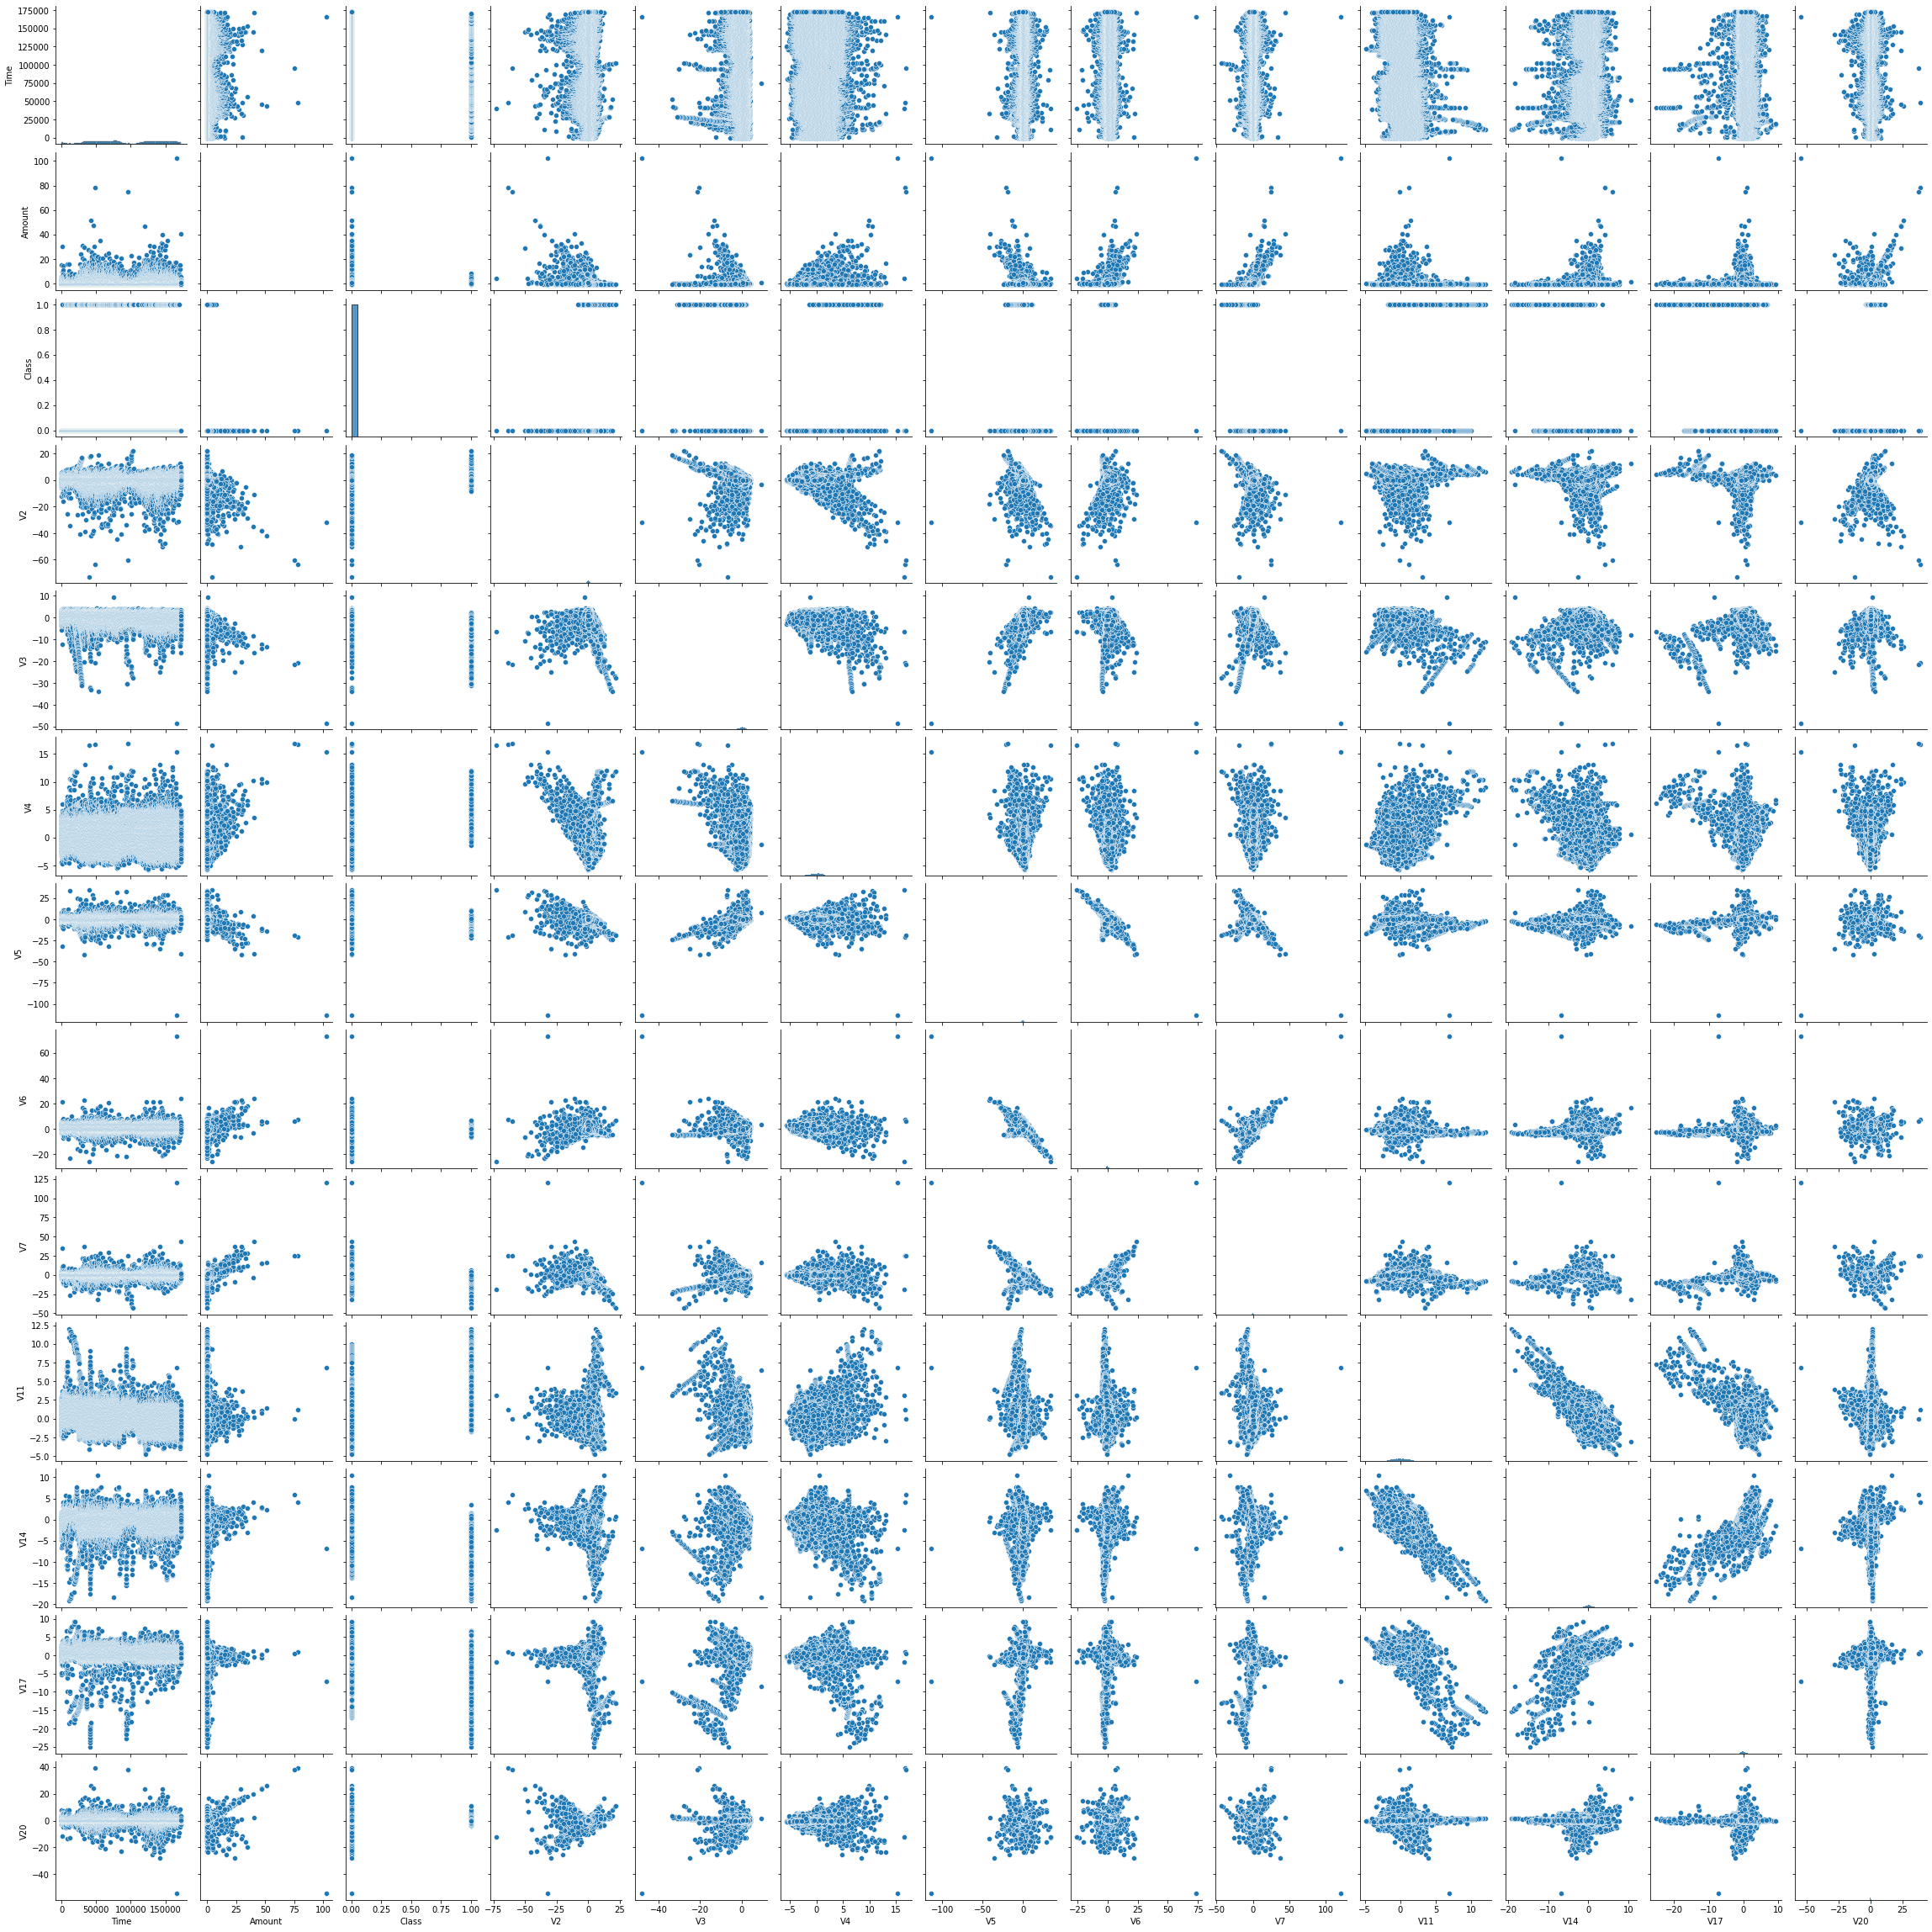

In [9]:
# Vamos fazer um pairplot somente destas variáveis que possuem um pouco mais de correlação.
variaveis = ['Time', 'Amount', 'Class', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V11', 'V14', 'V17', 'V20']

sns.pairplot(data=base[variaveis]);

0    284315
1       492
Name: Class, dtype: int64
------------------------------------------------------------
0    99.827251
1     0.172749
Name: Class, dtype: float64


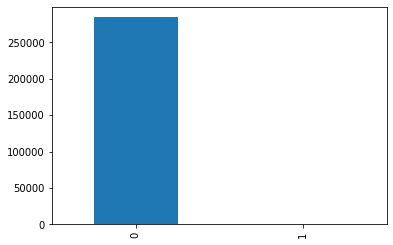

In [10]:
# Agora vamos plotar a quantidade de usuários fraude e não fraude em nossa base
print(base.Class.value_counts())
print('-'*60)
print(base.Class.value_counts(normalize=True)*100)
base.Class.value_counts().plot(kind='bar');

Verificamos que nossos dados estão **SUPER desbalanceados**, ou seja, temos apenas 0.17% (492) exemplos de usuários fraudulentos contra 99.83% (284315) que não apresentam fraude. Utilizaremos técnicas de `under sampling` (subamostragem) ou `over sampling` (sobreamostragem) de desbalanceamento.

In [11]:
base.shape

(284807, 31)

In [12]:
X = base.drop('Class', axis=1)
y = base['Class']

In [13]:
# Utilizar técnicas de balanceamento
over = RandomOverSampler(sampling_strategy=0.015)
under = RandomUnderSampler(sampling_strategy=0.15)
print(Counter(y))

X_balanceado, y_balanceado = over.fit_resample(X, y)
print(Counter(y_balanceado))

X_balanceado, y_balanceado = under.fit_resample(X_balanceado, y_balanceado)
print(Counter(y_balanceado))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 4264})
Counter({0: 28426, 1: 4264})


Class
0        28426
1         4264
dtype: int64
------------------------------------------------------------
Class
0        86.956256
1        13.043744
dtype: float64


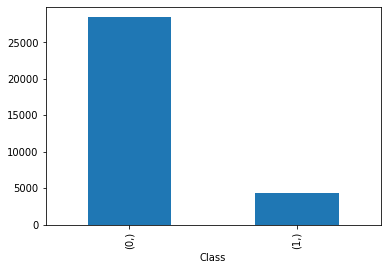

In [14]:
# Agora vamos plotar a quantidade de usuários fraude e não fraude em nossa base
df_y = pd.DataFrame(data=y_balanceado, columns=['Class'])
print(df_y.value_counts())
print('-'*60)
print(df_y.value_counts(normalize=True)*100)
df_y.value_counts().plot(kind='bar');

O super desbalanceamento deu uma ajustada. Agora começaremos a etapa de modelagem.

## Modelagem

Após os processos de processamento e entendimento dos dados, começaremos a parte de modelagem.

In [15]:
# Dividiremos os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, test_size=0.2, shuffle=True, random_state=38)

In [16]:
# Instaciar os modelos que serão utilizados em uma lista para iteração
modelos = [DecisionTreeClassifier(),
           KNeighborsClassifier(),
           ExtraTreesClassifier(),
                    RandomForestClassifier(),
                    LogisticRegression(),
                    LinearSVC(),
                    LGBMClassifier(),
                    XGBClassifier(),
                    XGBRFClassifier()
]

In [17]:
# Criar um dicionário para os indicadores que iremos analisar
relatorio = {
    'Nome': [],
     'Acurácia_treino': [],
     'Acurácia_teste': [],
    'Acurácia_cv': [],
    'Precisão': [],
    'Recall':[],
    'F1-Score':[],
     'AUC':[]
}

In [18]:
for classificador in modelos:
  print(f'Treinando o modelo {classificador.__class__.__name__}')
  classificador.fit(X_train, y_train)

  acuracia_treino = classificador.score(X_train, y_train)
  acuracia_teste = classificador.score(X_test, y_test) 
  acuracia_cv = cross_val_score(classificador, X_train, y_train, scoring='accuracy', cv=5) 
  acuracia_precisao = cross_val_score(classificador, X_train, y_train, scoring='precision', cv=5) 
  acuracia_recall = cross_val_score(classificador, X_train, y_train, scoring='recall', cv=5) 
  acuracia_f1 = cross_val_score(classificador, X_train, y_train, scoring='f1', cv=5) 
  acuracia_auc = cross_val_score(classificador, X_train, y_train, scoring='roc_auc', cv=5) 

  print(f'Acurácia treino: {acuracia_treino}')
  print(f'Acurácia teste: {acuracia_teste}')
  print(f'Acurácia Cross-Validation: {np.mean(acuracia_cv):.4f} +- {np.std(acuracia_cv):.4f}')
  print(f'Precisão Cross-Validation: {np.mean(acuracia_precisao):.4f} +- {np.std(acuracia_precisao):.4f}')
  print(f'Recall Cross-Validation: {np.mean(acuracia_recall):.4f} +- {np.std(acuracia_recall):.4f}')
  print(f'F1 Cross-Validation: {np.mean(acuracia_f1):.4f} +- {np.std(acuracia_f1):.4f}')
  print(f'AUC Cross-Validation: {np.mean(acuracia_auc):.4f} +- {np.std(acuracia_auc):.4f}')
  print('-'*70)

  relatorio['Nome'].append(classificador.__class__.__name__)
  relatorio['Acurácia_treino'].append(acuracia_treino)
  relatorio['Acurácia_teste'].append(acuracia_teste)
  relatorio['Acurácia_cv'].append(np.mean(acuracia_cv))
  relatorio['Precisão'].append(np.mean(acuracia_precisao))
  relatorio['Recall'].append(np.mean(acuracia_recall))
  relatorio['F1-Score'].append(np.mean(acuracia_f1))
  relatorio['AUC'].append(np.mean(acuracia_auc))


Treinando o modelo DecisionTreeClassifier
Acurácia treino: 1.0
Acurácia teste: 0.9973998164576323
Acurácia Cross-Validation: 0.9958 +- 0.0006
Precisão Cross-Validation: 0.9676 +- 0.0023
Recall Cross-Validation: 0.9985 +- 0.0029
F1 Cross-Validation: 0.9845 +- 0.0037
AUC Cross-Validation: 0.9971 +- 0.0018
----------------------------------------------------------------------
Treinando o modelo KNeighborsClassifier
Acurácia treino: 0.9903640256959315
Acurácia teste: 0.9810339553380238
Acurácia Cross-Validation: 0.9679 +- 0.0014
Precisão Cross-Validation: 0.8326 +- 0.0114
Recall Cross-Validation: 0.9443 +- 0.0115
F1 Cross-Validation: 0.8848 +- 0.0045
AUC Cross-Validation: 0.9928 +- 0.0013
----------------------------------------------------------------------
Treinando o modelo ExtraTreesClassifier
Acurácia treino: 1.0
Acurácia teste: 0.9998470480269196
Acurácia Cross-Validation: 0.9996 +- 0.0006
Precisão Cross-Validation: 0.9982 +- 0.0014
Recall Cross-Validation: 0.9985 +- 0.0029
F1 Cross-

In [19]:
relatorio = pd.DataFrame(relatorio).sort_values(by='F1-Score', ascending=False)
relatorio

,Nome,Acurácia_treino,Acurácia_teste,Acurácia_cv,Precisão,Recall,F1-Score,AUC
2,ExtraTreesClassifier,1.000000,0.999847,0.999579,0.998240,0.998534,0.998386,0.999788
3,RandomForestClassifier,1.000000,0.999847,0.999388,0.996781,0.998534,0.997949,0.999847
6,LGBMClassifier,1.000000,0.999847,0.999273,0.995907,0.998534,0.997217,0.999741
0,DecisionTreeClassifier,1.000000,0.997400,0.995756,0.967631,0.998534,0.984544,0.997112
7,XGBClassifier,0.992888,0.990211,0.990938,0.990164,0.939917,0.964359,0.998877
8,XGBRFClassifier,0.979122,0.980269,0.978931,0.986443,0.850233,0.913238,0.969625
4,LogisticRegression,0.974954,0.974304,0.974228,0.928685,0.869282,0.897963,0.962711
1,KNeighborsClassifier,0.990364,0.981034,0.967918,0.832594,0.944314,0.884817,0.992770
5,LinearSVC,0.964859,0.966045,0.821879,0.918187,0.734547,0.560655,0.907996


Para garantir que não tivemos OverFitting (Modelo muito ajustado aos dados de treino), vamos fazer uma nova avaliação dos dados de treino e teste com todo o processo novamente, porém, para garantir a análise mais adaptada ao mundo real, retiramos uma parte dos dados da base com exemplos de fraude e não fraude para avaliarmos novamente e termos certeza de qual modelo está tendo melhor desempenho.

In [20]:
print(Counter(y_test))
print(Counter(y))

Counter({0: 5686, 1: 852})
Counter({0: 284315, 1: 492})


In [67]:
base_teste = base.copy()
base_teste = base_teste.sort_values(ascending=False, by='Class')


teste1 = base_teste.iloc[350:550]
ix = [i for i in teste1.index] 
teste2 = base_teste.loc[~base_teste.index.isin(ix)]

In [68]:
print(teste1.Class.value_counts())
print(teste2.Class.value_counts())

1    142
0     58
Name: Class, dtype: int64
0    284257
1       350
Name: Class, dtype: int64


In [69]:
base_teste = base.copy()
base_teste = base_teste.sort_values(ascending=False, by='Class')
base_validacao = base_teste[100:].copy()
dados_nao_vistos = base_teste[:100]

In [70]:
base_validacao.Class.value_counts()

0    284315
1       392
Name: Class, dtype: int64

In [71]:
#X_valid_v1 = base_validacao.drop('Class', axis=1)
#y_valid_v1 = base_validacao['Class']
X_valid_v1 = teste2.drop(['Class'], axis=1)
y_valid_v1 = teste2['Class']

In [72]:
# Utilizar técnicas de balanceamento
#over = RandomOverSampler(sampling_strategy=0.015)
#under = RandomUnderSampler(sampling_strategy=0.15)
np.random.seed(10)
over = RandomOverSampler(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=0.2)
print(Counter(y_valid_v1))

X_balanceado_2, y_balanceado_2 = over.fit_resample(X_valid_v1, y_valid_v1)
print(Counter(y_balanceado_2))

X_balanceado_2, y_balanceado_2 = under.fit_resample(X_balanceado_2, y_balanceado_2)
print(Counter(y_balanceado_2))

Counter({0: 284257, 1: 350})
Counter({0: 284257, 1: 568})
Counter({0: 2840, 1: 568})


In [73]:
# Dividiremos os dados em treino e teste
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_balanceado_2, y_balanceado_2, test_size=0.2, shuffle=True, random_state=38)

In [74]:
#dados_nao_vistos = base_teste[:100]
#dados_X = dados_nao_vistos.drop('Class', axis=1)
#dados_y = dados_nao_vistos['Class']
dados_nao_vistos = teste1.copy()
dados_X = dados_nao_vistos.drop(['Class'], axis=1)
dados_y = dados_nao_vistos['Class']

In [75]:
# Vamos refazer esse teste com o melhor modelo
melhor_modelo = ExtraTreesClassifier()
melhor_modelo.fit(X_train_2, y_train_2)

acuracia_treino_2 = melhor_modelo.score(X_train_2, y_train_2)
acuracia_teste_2 = melhor_modelo.score(X_test_2, y_test_2) 
acuracia_desconhecido_2 = melhor_modelo.score(dados_X, dados_y) 
acuracia_cv_2 = cross_val_score(melhor_modelo, X_train_2, y_train_2, scoring='accuracy', cv=5) 
acuracia_precisao_2 = cross_val_score(melhor_modelo, X_train_2, y_train_2, scoring='precision', cv=5) 
acuracia_recall_2 = cross_val_score(melhor_modelo, X_train_2, y_train_2, scoring='recall', cv=5) 
acuracia_f1_2 = cross_val_score(melhor_modelo, X_train_2, y_train_2, scoring='f1', cv=5) 
acuracia_auc_2 = cross_val_score(melhor_modelo, X_train_2, y_train_2, scoring='roc_auc', cv=5) 

print(f'Acurácia treino: {acuracia_treino_2}')
print(f'Acurácia teste: {acuracia_teste_2}')
print(f'Acurácia desconhecido: {acuracia_desconhecido_2}')
print(f'Acurácia Cross-Validation: {np.mean(acuracia_cv_2):.4f} +- {np.std(acuracia_cv_2):.4f}')
print(f'Precisão Cross-Validation: {np.mean(acuracia_precisao_2):.4f} +- {np.std(acuracia_precisao_2):.4f}')
print(f'Recall Cross-Validation: {np.mean(acuracia_recall_2):.4f} +- {np.std(acuracia_recall_2):.4f}')
print(f'F1 Cross-Validation: {np.mean(acuracia_f1_2):.4f} +- {np.std(acuracia_f1_2):.4f}')
print(f'AUC Cross-Validation: {np.mean(acuracia_auc_2):.4f} +- {np.std(acuracia_auc_2):.4f}')
print('-'*70)

Acurácia treino: 1.0
Acurácia teste: 0.9956011730205279
Acurácia desconhecido: 0.885
Acurácia Cross-Validation: 0.9846 +- 0.0044
Precisão Cross-Validation: 0.9976 +- 0.0048
Recall Cross-Validation: 0.9086 +- 0.0273
F1 Cross-Validation: 0.9508 +- 0.0147
AUC Cross-Validation: 0.9867 +- 0.0070
----------------------------------------------------------------------


Verificado que para dados realmente desconhecidos, nosso melhor modelo visto anteriormente `ExtraTreesClassifier` obteve 86% de Acurácia. Agora visualizaremos mais métricas visando apenas os dados desconhecidos. 

In [76]:
# Predição com dados desconhecidos
y_pred_2 = melhor_modelo.predict(dados_X)

In [77]:
acc = accuracy_score(dados_y, y_pred_2)
f1_3 = f1_score(dados_y, y_pred_2)
pre_3 = precision_score(dados_y, y_pred_2)
rec_3 = recall_score(dados_y, y_pred_2)

print(f'Acurácia verdadeira: {acc}')
print(f'F1 verdadeiro: {f1_3}')
print(f'Precisão verdadeira: {pre_3}')
print(f'Recall verdadeiro: {rec_3}')

Acurácia verdadeira: 0.885
F1 verdadeiro: 0.9118773946360154
Precisão verdadeira: 1.0
Recall verdadeiro: 0.8380281690140845


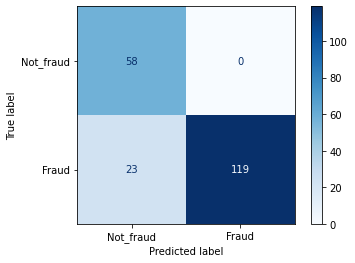

In [78]:
plot_confusion_matrix(estimator = melhor_modelo, X=dados_X, y_true=dados_y, 
                      cmap = plt.cm.Blues, display_labels=['Not_fraud','Fraud'],
                      normalize=None, values_format='d');

Criaremos um novo relatório para analisar a eficiência dos modelos com dados realmente não vistos, já que houve uma diferença identificada.

In [79]:
# Criar outro relatório
relatorio_atualizado = {
    'Nome': [],
     'Acurácia': [],
    'Precisão': [],
    'Recall':[],
    'F1-Score':[]
}

In [80]:
# Vamos refazer os testes com resultados reais.
for classificador in modelos:
  print(f'Treinando o modelo {classificador.__class__.__name__}')
  classificador.fit(X_train_2, y_train_2)
  pred = classificador.predict(dados_X.values)

  acc = accuracy_score(dados_y, pred)
  f1_3 = f1_score(dados_y, pred)
  pre_3 = precision_score(dados_y, pred)
  rec_3 = recall_score(dados_y, pred)

  print(f'Acurácia verdadeira: {acc}')
  print(f'F1 verdadeiro: {f1_3}')
  print(f'Precisão verdadeira: {pre_3}')
  print(f'Recall verdadeiro: {rec_3}')
  print('-'*70)

  relatorio_atualizado['Nome'].append(classificador.__class__.__name__)
  relatorio_atualizado['Acurácia'].append(acc)
  relatorio_atualizado['Precisão'].append(pre_3)
  relatorio_atualizado['Recall'].append(rec_3)
  relatorio_atualizado['F1-Score'].append(f1_3) 

Treinando o modelo DecisionTreeClassifier
Acurácia verdadeira: 0.87
F1 verdadeiro: 0.9015151515151515
Precisão verdadeira: 0.9754098360655737
Recall verdadeiro: 0.8380281690140845
----------------------------------------------------------------------
Treinando o modelo KNeighborsClassifier
Acurácia verdadeira: 0.45
F1 verdadeiro: 0.36781609195402304
Precisão verdadeira: 1.0
Recall verdadeiro: 0.22535211267605634
----------------------------------------------------------------------
Treinando o modelo ExtraTreesClassifier
Acurácia verdadeira: 0.885
F1 verdadeiro: 0.9118773946360154
Precisão verdadeira: 1.0
Recall verdadeiro: 0.8380281690140845
----------------------------------------------------------------------
Treinando o modelo RandomForestClassifier
Acurácia verdadeira: 0.885
F1 verdadeiro: 0.9118773946360154
Precisão verdadeira: 1.0
Recall verdadeiro: 0.8380281690140845
----------------------------------------------------------------------
Treinando o modelo LogisticRegression
Acu

In [81]:
relatorio_atualizado = pd.DataFrame(relatorio_atualizado).sort_values(by='F1-Score', ascending=False)
relatorio_atualizado

,Nome,Acurácia,Precisão,Recall,F1-Score
7,XGBClassifier,0.900,1.00000,0.859155,0.924242
4,LogisticRegression,0.895,1.00000,0.852113,0.920152
2,ExtraTreesClassifier,0.885,1.00000,0.838028,0.911877
3,RandomForestClassifier,0.885,1.00000,0.838028,0.911877
6,LGBMClassifier,0.885,1.00000,0.838028,0.911877
8,XGBRFClassifier,0.885,1.00000,0.838028,0.911877
0,DecisionTreeClassifier,0.870,0.97541,0.838028,0.901515
5,LinearSVC,0.675,1.00000,0.542254,0.703196
1,KNeighborsClassifier,0.450,1.00000,0.225352,0.367816


Agora com os dados mais adequados ao mundo real, verificamos que os modelos **XGBClassifier**, **ExtraTreesClassifier** e **Logistic Regression** tiveram um melhor desempenho.  

Iremos criar visualizações de uma matriz de confusão para entender melhor como esses 2 modelos desempenharam e trabalharemos para possíveis melhorias.

In [82]:
# Selecionar modelos
model_1 = XGBClassifier()
model_1.fit(X_train_2, y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [120]:
model_2 = ExtraTreesClassifier()
model_2.fit(X_train_2, y_train_2)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [84]:
model_3 = LogisticRegression()
model_3.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

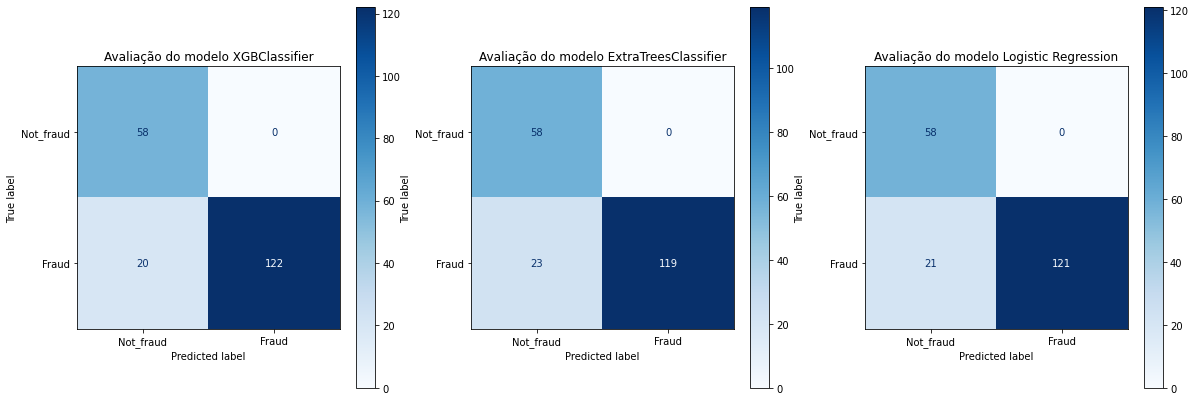

In [121]:
# Plotar matriz de confusão
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))

ax1.set_title('Avaliação do modelo XGBClassifier')
plot_confusion_matrix(estimator = model_1, X=dados_X.values, y_true=dados_y, 
                      cmap = plt.cm.Blues, display_labels=['Not_fraud','Fraud'],
                      normalize=None, values_format='d', ax=ax1)


ax2.set_title('Avaliação do modelo ExtraTreesClassifier')
plot_confusion_matrix(estimator = model_2, X=dados_X.values, y_true=dados_y, 
                      cmap = plt.cm.Blues, display_labels=['Not_fraud','Fraud'],
                      normalize=None, values_format='d', ax=ax2)

ax3.set_title('Avaliação do modelo Logistic Regression')
plot_confusion_matrix(estimator = model_3, X=dados_X.values, y_true=dados_y, 
                      cmap = plt.cm.Blues, display_labels=['Not_fraud','Fraud'],
                      normalize=None, values_format='d', ax=ax3);                      

Agora iremos trabalhar com os hiper-parâmetros para tentarmos aumentar o Recall de nosso modelo, pois como nos gráficos acima, nossa precisão está em 100%, todavia, estamos tendo erros em situações que o modelo prevê não ser fraude, porém, trata-se de fraude.

In [105]:
# Tunnando modelos
params = {
 #'max_depth':np.arange(1,15,2),# - Alteração feita (Melhor parâmetro 3)
 #'min_child_weight':np.arange(1,6)# - Alteração feita (Melhor parâmetro 5)
 #'gamma':[i/10.0 for i in np.arange(0,5)]# - Alteração feita (Melhor parâmetro 0.2)
 #'subsample':[i/10.0 for i in range(6,10)],- Alteração feita (Melhor parâmetro 0.7)
 #'colsample_bytree':[i/10.0 for i in range(6,10)] - Alteração feita (Melhor parâmetro 0.7)
}

grid_XGBC = GridSearchCV(XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=150, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.7, verbosity=1
), param_grid=params, cv=10, verbose=2, scoring='f1')


grid_XGBC.fit(X_train_2, y_train_2)
y_pred_XGBC = grid_XGBC.predict(dados_X.values)

acc = accuracy_score(dados_y, y_pred_XGBC)
f1_3 = f1_score(dados_y, y_pred_XGBC)
pre_3 = precision_score(dados_y, y_pred_XGBC)
rec_3 = recall_score(dados_y, y_pred_XGBC)

print('-'*70)
print(f'Acurácia verdadeira: {acc}')
print(f'F1 verdadeiro: {f1_3}')
print(f'Precisão verdadeira: {pre_3}')
print(f'Recall verdadeiro: {rec_3}')



Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] subsample=1.0 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... subsample=1.0, total=   1.2s
[CV] subsample=1.0 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... subsample=1.0, total=   1.2s
[CV] subsample=1.0 ...................................................
[CV] .................................... subsample=1.0, total=   1.1s
[CV] subsample=1.0 ...................................................
[CV] .................................... subsample=1.0, total=   1.1s
[CV] subsample=1.0 ...................................................
[CV] .................................... subsample=1.0, total=   1.2s
[CV] subsample=1.0 ...................................................
[CV] .................................... subsample=1.0, total=   1.1s
[CV] subsample=1.0 ...................................................
[CV] .................................... subsample=1.0, total=   1.2s
[CV] subsample=1.0 ...................................................
[CV] .................................... subsample=1.0, total=   1.1s
[CV] subsample=1.0 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   11.8s finished


----------------------------------------------------------------------
Acurácia verdadeira: 0.895
F1 verdadeiro: 0.9201520912547528
Precisão verdadeira: 1.0
Recall verdadeiro: 0.852112676056338


In [107]:
grid_XGBC.best_params_, grid_XGBC.best_score_

({'subsample': 1.0}, 0.9532692245744292)

In [118]:
model_1_tunado = XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=150, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.7, verbosity=1
)

model_1_tunado.fit(X_train_2, y_train_2)
y_model_1_tunado = model_1_tunado.predict(dados_X.values)

acc = accuracy_score(dados_y, y_model_1_tunado)
f1_3 = f1_score(dados_y, y_model_1_tunado)
pre_3 = precision_score(dados_y, y_model_1_tunado)
rec_3 = recall_score(dados_y, y_model_1_tunado)

print('-'*70)
print(f'Acurácia verdadeira: {acc}')
print(f'F1 verdadeiro: {f1_3}')
print(f'Precisão verdadeira: {pre_3}')
print(f'Recall verdadeiro: {rec_3}')

----------------------------------------------------------------------
Acurácia verdadeira: 0.91
F1 verdadeiro: 0.9323308270676691
Precisão verdadeira: 1.0
Recall verdadeiro: 0.8732394366197183


In [205]:
# Tunnando modelos
params = {
    'max_depth':np.arange(5,15),# - Alteração feita (Melhor parâmetro 14)
}

grid_etc = GridSearchCV(ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                     criterion='gini', max_depth=15, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=10, verbose=0,
                     warm_start=False
), param_grid=params, cv=10, verbose=1, scoring='f1')


grid_etc.fit(X_train_2, y_train_2)
y_pred_etc = grid_etc.predict(dados_X.values)

acc = accuracy_score(dados_y, y_pred_etc)
f1_3 = f1_score(dados_y, y_pred_etc)
pre_3 = precision_score(dados_y, y_pred_etc)
rec_3 = recall_score(dados_y, y_pred_etc)

print('-'*70)
print(f'Acurácia verdadeira: {acc}')
print(f'F1 verdadeiro: {f1_3}')
print(f'Precisão verdadeira: {pre_3}')
print(f'Recall verdadeiro: {rec_3}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.9s finished


----------------------------------------------------------------------
Acurácia verdadeira: 0.89
F1 verdadeiro: 0.916030534351145
Precisão verdadeira: 1.0
Recall verdadeiro: 0.8450704225352113


In [206]:
grid_etc.best_params_, grid_etc.best_score_

({'max_depth': 14}, 0.9437633756384354)

In [207]:
model_2_tunado = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                     criterion='gini', max_depth=14, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=10, verbose=0,
                     warm_start=False
)


model_2_tunado.fit(X_train_2, y_train_2)
y_model_2_tunado = model_2_tunado.predict(dados_X.values)

acc = accuracy_score(dados_y, y_model_2_tunado)
f1_3 = f1_score(dados_y, y_model_2_tunado)
pre_3 = precision_score(dados_y, y_model_2_tunado)
rec_3 = recall_score(dados_y, y_model_2_tunado)

print('-'*70)
print(f'Acurácia verdadeira: {acc}')
print(f'F1 verdadeiro: {f1_3}')
print(f'Precisão verdadeira: {pre_3}')
print(f'Recall verdadeiro: {rec_3}')

----------------------------------------------------------------------
Acurácia verdadeira: 0.89
F1 verdadeiro: 0.916030534351145
Precisão verdadeira: 1.0
Recall verdadeiro: 0.8450704225352113


In [90]:
# Tunnando modelos
params = {
 'C': [8,16,25,30,80,100], #- Alteração feita (Melhor parâmetro 8)
 #'max_iter': [100,150,200,250,500], #- Alteração feita (Melhor parâmetro 200)
}

grid_lr = GridSearchCV(LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False
), param_grid=params, cv=10, verbose=2, scoring='f1')


grid_lr.fit(X_train_2, y_train_2)
y_pred_lr = grid_lr.predict(dados_X.values)

acc = accuracy_score(dados_y, y_pred_lr)
f1_3 = f1_score(dados_y, y_pred_lr)
pre_3 = precision_score(dados_y, y_pred_lr)
rec_3 = recall_score(dados_y, y_pred_lr)

print('-'*70)
print(f'Acurácia verdadeira: {acc}')
print(f'F1 verdadeiro: {f1_3}')
print(f'Precisão verdadeira: {pre_3}')
print(f'Recall verdadeiro: {rec_3}')

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


In [218]:
model_3_tunado = LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False
)

model_3_tunado.fit(X_train_2, y_train_2)
y_model_3_tunado = model_3_tunado.predict(dados_X.values)

acc = accuracy_score(dados_y, y_model_3_tunado)
f1_3 = f1_score(dados_y, y_model_3_tunado)
pre_3 = precision_score(dados_y, y_model_3_tunado)
rec_3 = recall_score(dados_y, y_model_3_tunado)

print('-'*70)
print(f'Acurácia verdadeira: {acc}')
print(f'F1 verdadeiro: {f1_3}')
print(f'Precisão verdadeira: {pre_3}')
print(f'Recall verdadeiro: {rec_3}')

----------------------------------------------------------------------
Acurácia verdadeira: 0.915
F1 verdadeiro: 0.9363295880149813
Precisão verdadeira: 1.0
Recall verdadeiro: 0.8802816901408451


Depois das alterações, verificaremos novamente a matriz de confusão.

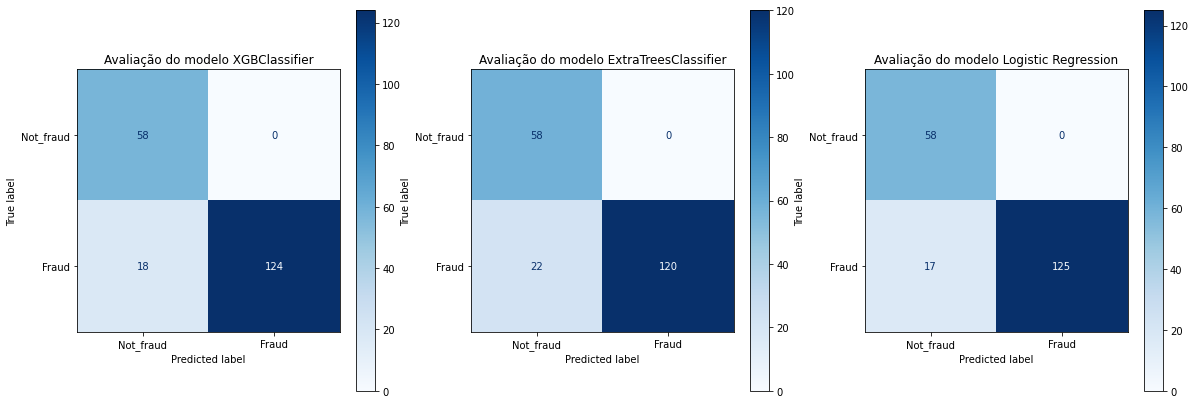

In [219]:
# Plotar matriz de confusão
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))

ax1.set_title('Avaliação do modelo XGBClassifier')
plot_confusion_matrix(estimator = model_1_tunado, X=dados_X.values, y_true=dados_y, 
                      cmap = plt.cm.Blues, display_labels=['Not_fraud','Fraud'],
                      normalize=None, values_format='d', ax=ax1)


ax2.set_title('Avaliação do modelo ExtraTreesClassifier')
plot_confusion_matrix(estimator = model_2_tunado, X=dados_X.values, y_true=dados_y, 
                      cmap = plt.cm.Blues, display_labels=['Not_fraud','Fraud'],
                      normalize=None, values_format='d', ax=ax2)

ax3.set_title('Avaliação do modelo Logistic Regression')
plot_confusion_matrix(estimator = model_3_tunado, X=dados_X.values, y_true=dados_y, 
                      cmap = plt.cm.Blues, display_labels=['Not_fraud','Fraud'],
                      normalize=None, values_format='d', ax=ax3);                      

## Conclusão

Para o nosso problema de classificação em prever se uma transação será fraude ou não, ficamos com o modelo de LogisticRegression (Regressão Logística), no qual possui uma Acurácia em relação aos dados não vistos de 91.5%. Considero um resultado positivo, levando em conta que nossa base de dados possui um enorme problema de desbalanceamento e para evitar isso tivemos que utilizar algumas técnicas de sobreajustes conforme está detalhado acima neste notebook. 